### **Cutomer Lifetime Value**

[Sumber data: data_customer_lifetime_value.csv](https://drive.google.com/file/d/1pYhQb2WcbwLAaMF4FPIEJSM34O-1A4v8/view?usp=sharing) 

### **Contents**

1. **Problem Statement and Business Context**  
2. **Data Understanding and Preprocessing**  
3. **Exploratory Data Analysis (if needed)**  
4. **Feature Engineering**  
5. **Modeling and Evaluation (with multiple algorithms)**  
6. **Conclusions and Recommendations**  

****

### **Problem Statement and Business Context**  

#### Problem Statement:
The objective of this project is to develop a predictive model for **Customer Lifetime Value (CLV)**, which estimates the total worth of a customer to a company over the course of their relationship. By accurately forecasting CLV, the company can make data-driven decisions to optimize marketing investments, enhance customer retention strategies, and better allocate resources, all while maximizing profitability.

#### Business Context:
**Customer Lifetime Value (CLV)** is one of the most important metrics for businesses in customer-centric industries. It represents the total net profit a company expects to earn from a customer over the entire duration of their relationship. CLV helps businesses understand the long-term value of each customer, which is crucial for effective decision-making in areas like marketing, sales, and customer service.

Understanding CLV offers several key advantages to a business:

1. **Optimizing Marketing and Advertising Spend**:
   - CLV enables businesses to focus their marketing resources on high-value customers. By targeting those who are likely to provide the most revenue over time, companies can improve the return on investment (ROI) of marketing campaigns, reducing the costs associated with customer acquisition and retention.

2. **Improved Customer Retention and Loyalty Programs**:
   - By predicting CLV, companies can identify customers who are at risk of churning or who may require additional attention. This allows for the development of personalized retention strategies that are tailored to the value of each customer, which in turn helps enhance loyalty and reduce churn rates.

3. **Strategic Resource Allocation**:
   - With an accurate prediction of CLV, businesses can prioritize resources and allocate budgets more effectively. High-value customers may warrant more focus in terms of customer service, exclusive offerings, or product development, ensuring that the business maximizes long-term profitability.

4. **Forecasting Future Revenue**:
   - CLV provides valuable insights into the future revenue potential of a customer base. This helps businesses make informed decisions about growth strategies, product offerings, and market expansions.

5. **Customer Segmentation**:
   - Businesses can segment their customer base into distinct groups based on predicted CLV. This segmentation enables the creation of targeted marketing campaigns, tailored products, and differentiated customer service approaches that resonate with each segment.

In this project, we aim to build a machine learning model that predicts **Customer Lifetime Value** using customer attributes such as demographic information, behavior patterns, and financial transactions. By predicting CLV, the company can identify valuable customers, prioritize marketing efforts, and enhance overall business performance.

---

### **Data Understanding and Preprocessing**  

In [583]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Load the Dataset and Check the First Few Rows**

 - After loading the dataset, check the first few rows:

In [584]:
# Load Dataset
df = pd.read_csv(r"C:\\Users\\garne\\Downloads\\data_customer_lifetime_value.csv")

# Check first few rows of the dataset
df.head()


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


Vehicle Class:
Different vehicle types, which may influence customer value.

Coverage:
Higher coverage types likely correlate with higher CLV.

Renew Offer Type:
Marketing offers like "Offer1" or "Offer3" may impact CLV.

Employment Status:
Employment may influence CLV, with employed customers likely having higher incomes.

Marital Status:
Could affect customer behavior and retention.

Education:
Higher education may correlate with higher income and CLV.

Number of Policies:
More policies likely increase CLV.

Monthly Premium Auto:
Higher premiums correlate with higher CLV.

Total Claim Amount:
Higher claims may negatively affect CLV.

Income:
Higher income is likely associated with higher CLV.

Customer Lifetime Value:
The target variable, influenced by all other features.

**Check Data Types**:
   - Verify that each column has the correct data type (numerical or categorical). If any columns are incorrectly typed, we’ll correct them.

In [585]:
df.dtypes

Vehicle Class               object
Coverage                    object
Renew Offer Type            object
EmploymentStatus            object
Marital Status              object
Education                   object
Number of Policies         float64
Monthly Premium Auto       float64
Total Claim Amount         float64
Income                     float64
Customer Lifetime Value    float64
dtype: object

- **Categorical Features**:  
  - `Vehicle Class`, `Coverage`, `Renew Offer Type`, `EmploymentStatus`, `Marital Status`, `Education`  
  These columns are non-numeric and will need encoding before use in machine learning models.
  
- **Numerical Features**:  
  - `Number of Policies`, `Monthly Premium Auto`, `Total Claim Amount`, `Income`, `Customer Lifetime Value`  
  These are already numeric and can be used for modeling after necessary preprocessing (e.g., scaling, handling outliers).

**Check for Missing Values**:
   - After ensuring the correct data types, check for missing or null values in the dataset.

In [586]:
df.isnull().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

- **No Missing Data**: All features are complete, so no imputation or removal of rows is required. This ensures that the dataset is ready for further analysis and modeling without having to handle missing values.

**Check for Duplicates**:
   - Identify if there are any duplicate rows in the dataset and decide if they need to be removed.

In [587]:
df.duplicated().sum()

np.int64(618)

- **Duplicates**: 618 rows are identical to others. It would be important to remove these duplicates to ensure that the model isn't biased by repeated data, which could distort predictions and model performance.

**Check for Outliers**:
   - For numerical features, use statistical methods (e.g., IQR or Z-score) to detect outliers. This is important as outliers can affect model performance.

In [588]:
numerical_columns = df.select_dtypes(include=['float64']).columns
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()
outliers

Number of Policies         264
Monthly Premium Auto       275
Total Claim Amount         265
Income                       0
Customer Lifetime Value    499
dtype: int64

- **Outliers**:
  - `Number of Policies`: 264 outliers
  - `Monthly Premium Auto`: 275 outliers
  - `Total Claim Amount`: 265 outliers
  - `Income`: No outliers detected
  - `Customer Lifetime Value`: 499 outliers

Outliers can skew the results of the model. It’s important to decide whether to remove or handle these outliers depending on their impact and domain knowledge.

**Correlation Analysis**:
   - Compute and visualize the correlation matrix to understand the relationships between numerical features, including the target variable (Customer Lifetime Value).

In [589]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Handle Categorical Features (using LabelEncoder for simplicity)
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to all categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Step 2: Compute Correlation between Target and All Features
correlation_with_target = df.corr()['Customer Lifetime Value'].sort_values(ascending=False)
print("Correlation with Target (Customer Lifetime Value):")
print(correlation_with_target)

# Step 3: Compute Correlation Matrix for All Features
correlation_matrix = df.corr()
print("\nCorrelation Matrix for All Features:")
print(correlation_matrix)


Correlation with Target (Customer Lifetime Value):
Customer Lifetime Value    1.000000
Monthly Premium Auto       0.402297
Total Claim Amount         0.215354
Coverage                   0.175497
Vehicle Class              0.081951
Education                  0.042842
Income                     0.025698
Number of Policies         0.024721
Marital Status            -0.015242
EmploymentStatus          -0.030905
Renew Offer Type          -0.075258
Name: Customer Lifetime Value, dtype: float64

Correlation Matrix for All Features:
                         Vehicle Class  Coverage  Renew Offer Type  \
Vehicle Class                 1.000000 -0.010019         -0.022115   
Coverage                     -0.010019  1.000000         -0.060110   
Renew Offer Type             -0.022115 -0.060110          1.000000   
EmploymentStatus             -0.001929  0.005059         -0.128139   
Marital Status                0.016174 -0.002526         -0.019941   
Education                     0.003793  0.026994 

#### **Correlation with Target (Customer Lifetime Value):**
- **Strongest Positive Correlation:**  
  - `Monthly Premium Auto (0.402)` has the highest positive correlation with the target variable, indicating that as monthly premiums increase, customer lifetime value tends to be higher.
- **Moderate Positive Correlations:**  
  - `Total Claim Amount (0.215)` also shows a positive correlation with CLV, meaning that higher claim amounts are associated with higher customer value.
- **Weak Positive Correlations:**  
  - `Coverage (0.175)` and `Vehicle Class (0.082)` show weak positive correlations, suggesting some relationship but not a strong one with CLV.
- **Weak to Negative Correlations:**  
  - `Renew Offer Type (-0.075)`, `EmploymentStatus (-0.031)`, and `Marital Status (-0.015)` show weak negative correlations, meaning these factors have a small inverse relationship with CLV.
- **No Strong Correlations:**  
  - `Education (0.043)`, `Income (0.026)`, `Number of Policies (0.025)` show very weak correlations with CLV, suggesting they have minimal influence on the customer lifetime value in this dataset.

#### **Correlation Matrix for All Features:**
- **High Positive Correlation:**  
  - `Monthly Premium Auto` and `Total Claim Amount` (0.636) are highly positively correlated, which is expected since customers who pay higher premiums might also have higher claim amounts.
- **Moderate Positive Correlation:**  
  - `EmploymentStatus` and `Total Claim Amount` (0.330) suggest a positive association between the two variables, which may imply that certain employment statuses are linked with higher claims.
- **Negative Correlations:**  
  - `Income` has a strong negative correlation with `EmploymentStatus (-0.726)` and `Total Claim Amount (-0.353)`. This could indicate that higher incomes are often associated with fewer claims and certain employment statuses (e.g., retired, employed) may influence claims and income patterns.

### Summary:
From the correlation analysis:
- **Key Drivers for CLV:** Monthly Premium Auto and Total Claim Amount are the most important numerical features affecting Customer Lifetime Value.
- **Other Features:** While many categorical features show weak correlations, factors such as `Coverage` and `Vehicle Class` contribute somewhat to CLV prediction.

These insights help prioritize features that will contribute more strongly to the machine learning model in the next stages.

### **Feature Engineering**  

**Handling Missing Values**  
   Upon checking the dataset using `df.isnull().sum()`, there are **no missing values** in any feature, so there is no need for imputation or removal of rows based on missing data.

**Handling Duplicates**  
   The dataset contains **618 duplicate rows**, as identified by `df.duplicated().sum()`. These duplicate rows will be removed to ensure the model is trained on unique data and to avoid bias.

In [590]:
# Drop duplicates
df = df.drop_duplicates()

# Confirm duplicates are removed
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")


Number of duplicate rows after removal: 0


**Encoding Categorical Features**  
   The categorical features in the dataset are as follows: 'Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status', 'Marital Status', and 'Education'. These need to be converted into numerical formats for modeling:
   - **One-Hot Encoding**: Applied to nominal features with no inherent order, such as 'Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status', 'Marital Status', and 'Education'. This will create binary columns for each category in these features.
   - **Label Encoding**: If any feature has an inherent order (e.g., 'Education'), we can apply label encoding (e.g., 'High School or Below' = 1, 'College' = 2, 'Master' = 3). However, based on your dataset, these features do not have strong ordinality, so One-Hot Encoding would be the most effective approach.

In [591]:
# Check unique values in Education
print("Unique values in Education before mapping:", df['Education'].unique())

# Updated mapping based on unique values
education_mapping = {
    1: 'High School or Below',
    2: 'College',
    3: 'Master',
    0: 'Other',  # Handle unknown values
    4: 'PhD'  # Assuming 4 corresponds to 'PhD'
}

# Apply mapping to Education column
df['Education'] = df['Education'].map(education_mapping)

# Check for NaN values and fill them or handle them as needed
df['Education'] = df['Education'].fillna('Unknown')

# Reapply one-hot encoding on categorical variables
categorical_features = ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Show the updated dataframe and the columns after encoding
print(df.head())
print(f"Columns after encoding: {df.columns}")


Unique values in Education before mapping: [3 1 4 0 2]
              Education  Number of Policies  Monthly Premium Auto  \
0                Master                 2.0                  90.0   
1  High School or Below                 6.0                  62.0   
2                   PhD                 2.0                  62.0   
3                Master                 1.0                 116.0   
4                Master                 1.0                  62.0   

   Total Claim Amount   Income  Customer Lifetime Value  Vehicle Class_1  \
0          571.479602  11828.0             10083.486880            False   
1          114.514440  44762.0              4943.386117            False   
2          257.248789  21514.0             11981.984810            False   
3          556.800000  17913.0              4550.856045            False   
4          355.820799  19030.0              2372.155492            False   

   Vehicle Class_2  Vehicle Class_3  Vehicle Class_4  ...  Coverage_2  \


#### **Descriptive Statistics (df.describe())**

The `df.describe()` method provides a summary of the statistical properties of the numerical features in the dataset. This summary includes key measures such as:

- **Count**: The number of non-null entries.
- **Mean**: The average value of each feature.
- **Standard Deviation (std)**: The measure of variability or spread of the feature.
- **Minimum (min)** and **Maximum (max)**: The range of values in the dataset.
- **25th, 50th, and 75th Percentiles (Q1, Q2, Q3)**: These represent the first, second (median), and third quartiles, respectively, helping to understand the spread of the data.

These statistics provide useful insights into the distribution of each feature, helping to identify potential issues like:

- **Skewed data distributions**
- **Presence of outliers**
- **Data imbalances**

In [592]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


- **Number of Policies**: The number of policies per customer ranges from 1 to 9, with a mean of approximately 3. This indicates that most customers hold a small number of policies.
- **Monthly Premium Auto**: The premiums vary between 61 and 297, with a mean of 92.91, indicating that the majority of premiums fall within this range, though there are some high outliers.
- **Total Claim Amount**: The total claim amounts range from a minimum of 0.42 to a maximum of 2759.79. The mean value of 429.80 suggests most claims are below 600, but some large claims exist.
- **Income**: Income ranges from 0 to 99934, with a mean of 37,739.84. The large variation suggests the presence of both low-income and high-income customers, with a few extreme values at the upper and lower ends.
- **Customer Lifetime Value**: This feature spans from 1898.01 to 83325.38, with a mean of 8059.48. A wide range of values indicates that some customers are much more valuable than others.

#### **Handling Outliers**

Outliers are identified in the numerical features: 'Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', and 'Customer Lifetime Value'. The following steps are taken to handle the outliers:

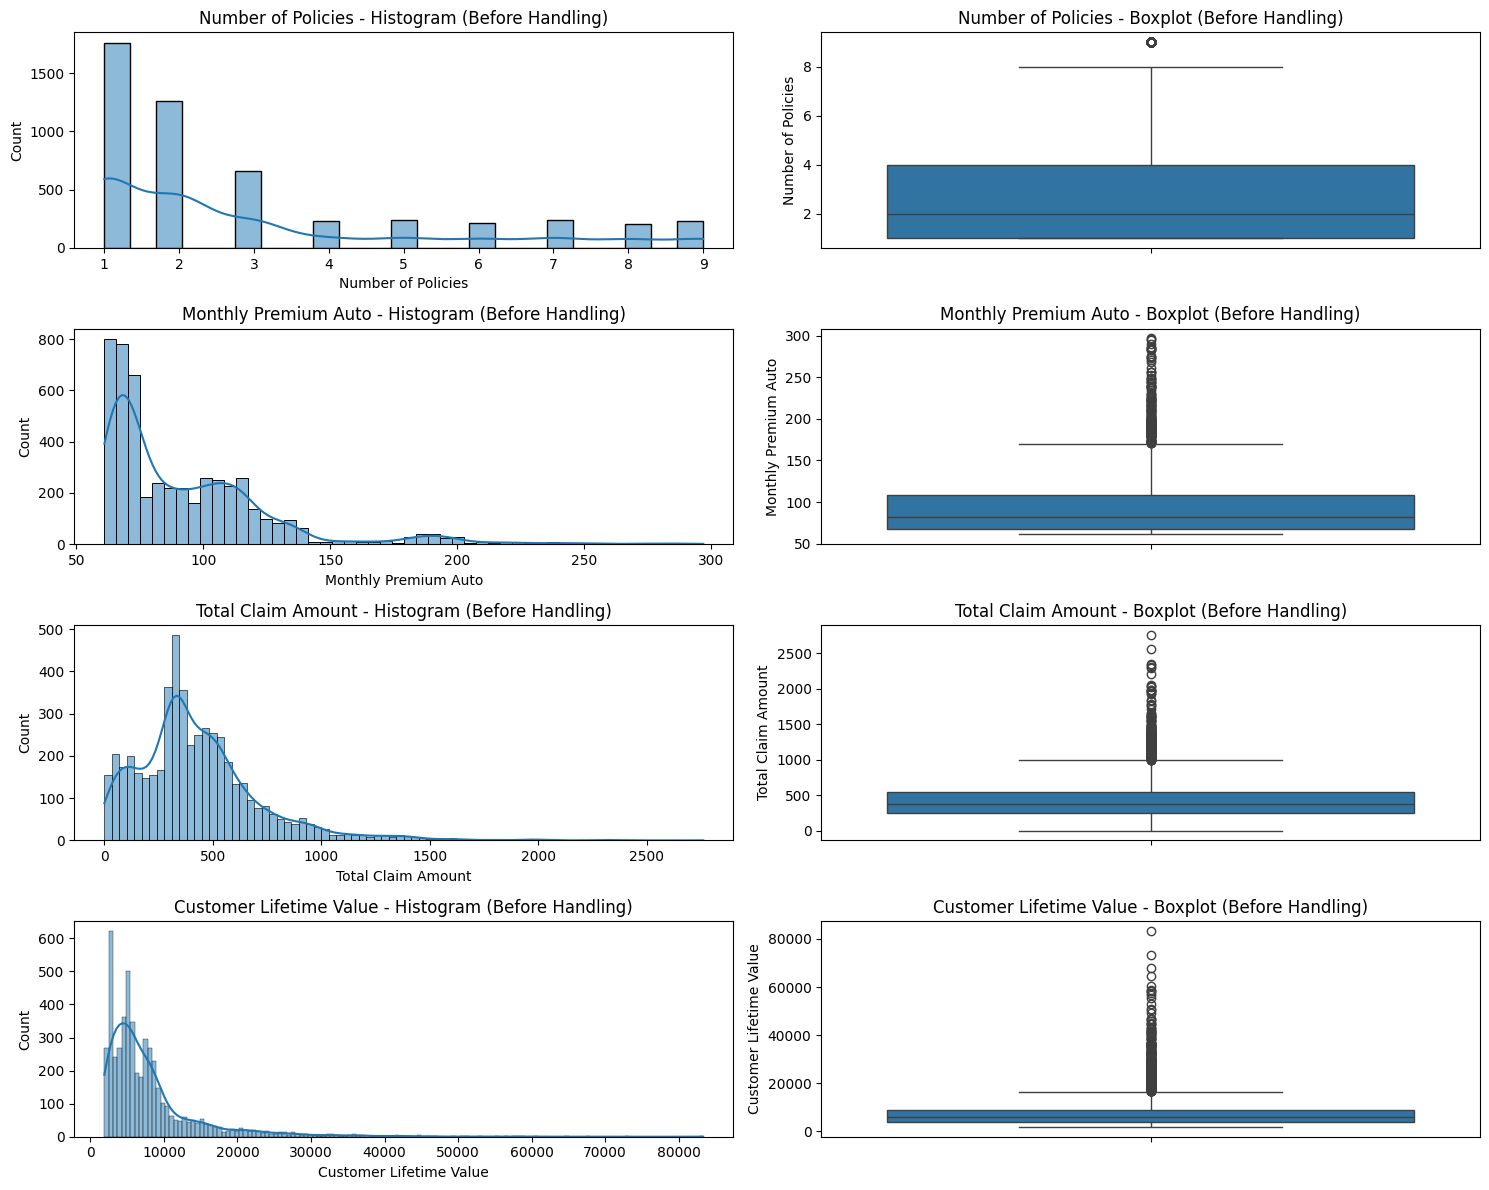

(5051, 22)
<bound method NDFrame.describe of                  Education  Number of Policies  Monthly Premium Auto  \
0                   Master                 2.0                  90.0   
1     High School or Below                 6.0                  62.0   
2                      PhD                 2.0                  62.0   
3                   Master                 1.0                 116.0   
4                   Master                 1.0                  62.0   
...                    ...                 ...                   ...   
5663                Master                 2.0                  69.0   
5664                Master                 1.0                  74.0   
5665                 Other                 2.0                 109.0   
5666                 Other                 1.0                  62.0   
5668  High School or Below                 1.0                 199.0   

      Total Claim Amount   Income  Customer Lifetime Value  Vehicle Class_1  \
0          

In [593]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_features = ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Customer Lifetime Value']

# Plot histograms and boxplots
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(15, 12))
for i, feature in enumerate(numerical_features):
    # Histogram
    sns.histplot(df[feature], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'{feature} - Histogram (Before Handling)')
    # Boxplot
    sns.boxplot(df[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} - Boxplot (Before Handling)')

plt.tight_layout()
plt.show()
print(df.shape)
print(df.describe)


**Feature-Specific Approach**:

   - **Number of Policies**: 
     - Use **3-sigma rule (Gaussian assumption)**. Since this feature has relatively fewer extreme values, this method allows retaining more natural variance while limiting outliers.

In [594]:
# Calculate mean and std
mean = df['Number of Policies'].mean()
std = df['Number of Policies'].std()

# Apply 3-sigma rule
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# Capping outliers
df['Number of Policies'] = df['Number of Policies'].clip(lower=lower_bound, upper=upper_bound)


- **Monthly Premium Auto**:
     - Apply **IQR capping (1st and 99th percentiles)**. This ensures skewed distributions are handled effectively without overly compressing the data

In [595]:
# Calculate IQR
Q1 = df['Monthly Premium Auto'].quantile(0.25)
Q3 = df['Monthly Premium Auto'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers
df['Monthly Premium Auto'] = df['Monthly Premium Auto'].clip(lower=lower_bound, upper=upper_bound)


   - **Total Claim Amount**:
     - Use **log transformation** to manage skewness, followed by **IQR-based capping**. This combination reduces the effect of extreme outliers while normalizing the data for models sensitive to skewness (e.g., linear regression).

In [596]:
import numpy as np

# Apply log transformation
df['Total Claim Amount'] = df['Total Claim Amount'].apply(lambda x: np.log1p(x) if x > 0 else x)

# Calculate IQR on transformed data
Q1 = df['Total Claim Amount'].quantile(0.25)
Q3 = df['Total Claim Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers
df['Total Claim Amount'] = df['Total Claim Amount'].clip(lower=lower_bound, upper=upper_bound)


- **Customer Lifetime Value (Target Variable)**:
     - Apply **Winsorization** (capping extreme values) at the **1st and 99th percentiles**. Retaining extreme values with slight adjustments prevents loss of high-value customers that are critical to business insights.

In [597]:
from scipy.stats.mstats import winsorize

# Winsorize at 1st and 99th percentiles
df['Customer Lifetime Value'] = winsorize(df['Customer Lifetime Value'], limits=[0.01, 0.01])


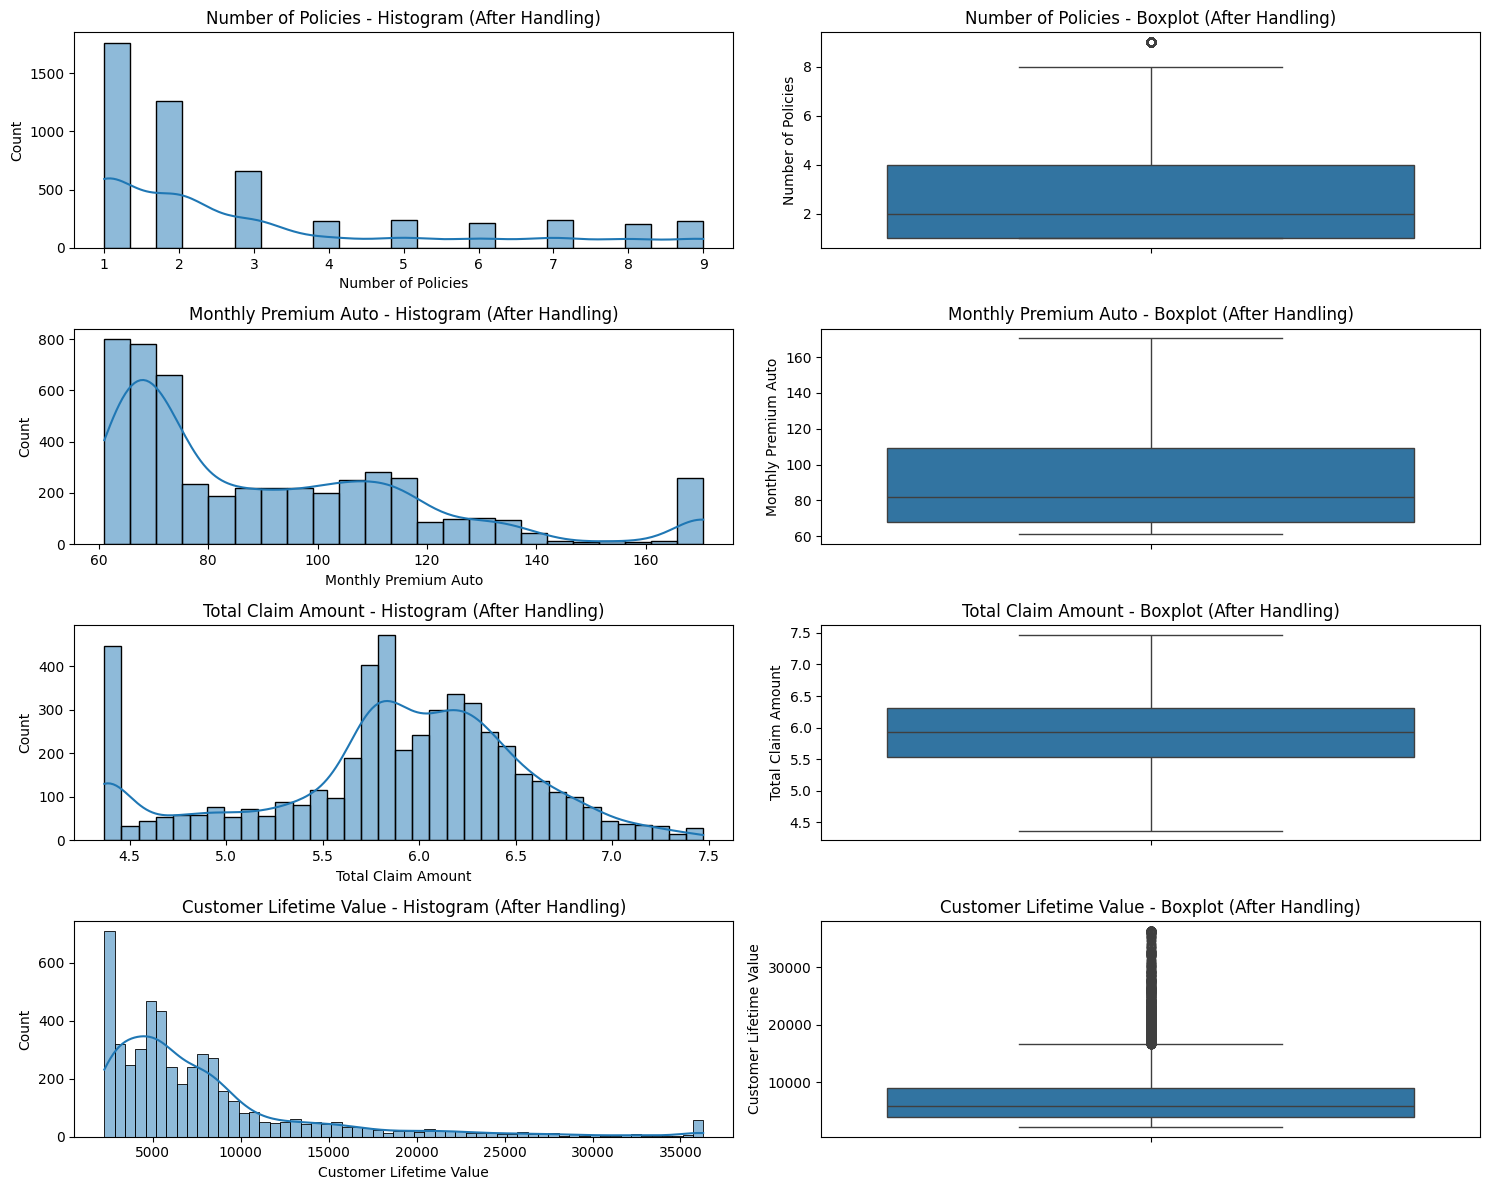

(5051, 22)
<bound method NDFrame.describe of                  Education  Number of Policies  Monthly Premium Auto  \
0                   Master                 2.0                  90.0   
1     High School or Below                 6.0                  62.0   
2                      PhD                 2.0                  62.0   
3                   Master                 1.0                 116.0   
4                   Master                 1.0                  62.0   
...                    ...                 ...                   ...   
5663                Master                 2.0                  69.0   
5664                Master                 1.0                  74.0   
5665                 Other                 2.0                 109.0   
5666                 Other                 1.0                  62.0   
5668  High School or Below                 1.0                 170.5   

      Total Claim Amount   Income  Customer Lifetime Value  Vehicle Class_1  \
0          

In [598]:
# Plot histograms and boxplots
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(15, 12))
for i, feature in enumerate(numerical_features):
    # Histogram
    sns.histplot(df[feature], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'{feature} - Histogram (After Handling)')
    # Boxplot
    sns.boxplot(df[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} - Boxplot (After Handling)')

plt.tight_layout()
plt.show()
print(df.shape)
print(df.describe)


**Scaling Numerical Features**  
   Several numerical features need to be scaled for use in machine learning models:
   - **Standard Scaling**: Features like 'Income', 'Monthly Premium Auto', 'Total Claim Amount', 'Customer Lifetime Value', and 'Number of Policies' will be scaled using **StandardScaler** to normalize them and improve model performance, especially for models sensitive to scale such as linear regression and neural networks.
   - **Min-Max Scaling**: This can be considered as an alternative depending on the nature of the model being used.

In [599]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the scalers
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# List of numerical columns to scale
numerical_columns = ['Income', 'Monthly Premium Auto', 'Total Claim Amount', 'Customer Lifetime Value', 'Number of Policies']

# Standard Scaling
df[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

# Optionally, apply Min-Max Scaling if needed
# df[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

# Check the first few rows of the scaled data
print(df[numerical_columns].head())


     Income  Monthly Premium Auto  Total Claim Amount  \
0 -0.844352             -0.043668            0.705780   
1  0.228821             -1.018860           -1.535774   
2 -0.528728             -1.018860           -0.409063   
3 -0.646069              0.861867            0.669401   
4 -0.609671             -1.018860            0.043721   

   Customer Lifetime Value  Number of Policies  
0                 0.332775           -0.415746  
1                -0.471498            1.260514  
2                 0.629834           -0.415746  
3                -0.532918           -0.834812  
4                -0.873820           -0.834812  


### **Feature Creation**

New features will be generated to enhance the predictive power of the model:

#### 1. **Interaction Features**  
We will create interaction features between pairs of variables to capture more complex relationships.

- **'Monthly Premium Auto' * 'Number of Policies'**: This feature will capture the relationship between the premium amount and the number of policies a customer holds.
- **'Income' * 'Number of Policies'**: This feature will explore the interaction between income and the number of policies a customer has.

#### 2. **Binning Continuous Features**  
Continuous features will be binned into categories to reduce the impact of outliers and improve model generalization.

- **Income**: This will be grouped into **low, medium, and high** income brackets.
- **Number of Policies**: This will be categorized into **1-2 policies, 3-5 policies, and 6+ policies**.

#### 3. **Log Transformation**  
To address skewness and help fit the model assumptions, log transformation will be applied to continuous variables.

- **'Total Claim Amount'** and **'Income'** will undergo log transformation to reduce their skewness and stabilize variance.




In [600]:
# Check for missing values
print(X.isnull().sum())

Monthly Premium Auto    0
Total Claim Amount      0
Vehicle Class_1         0
Vehicle Class_2         0
Vehicle Class_3         0
Vehicle Class_4         0
Vehicle Class_5         0
Coverage_1              0
Coverage_2              0
Renew Offer Type_1      0
dtype: int64


In [601]:
print(X.dtypes)


Monthly Premium Auto    int64
Total Claim Amount      int64
Vehicle Class_1         int64
Vehicle Class_2         int64
Vehicle Class_3         int64
Vehicle Class_4         int64
Vehicle Class_5         int64
Coverage_1              int64
Coverage_2              int64
Renew Offer Type_1      int64
dtype: object


In [602]:
X = X.astype(int)  # Convert all boolean columns to integer

In [603]:
X = X.replace([np.inf, -np.inf], np.nan)  # Replace any infinite values with NaN
X = X.dropna()  # Drop rows with NaN values


In [605]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Recompute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                Feature       VIF
0  Monthly Premium Auto  2.875772
1    Total Claim Amount  1.143551
2       Vehicle Class_1  1.583648
3       Vehicle Class_2  1.571254
4       Vehicle Class_3  1.343548
5       Vehicle Class_4  1.104683
6       Vehicle Class_5  1.196717
7            Coverage_1  1.333379
8            Coverage_2  1.196781
9    Renew Offer Type_1  1.255848


In [606]:
print(df.columns)

Index(['Education', 'Number of Policies', 'Monthly Premium Auto',
       'Total Claim Amount', 'Income', 'Customer Lifetime Value',
       'Vehicle Class_1', 'Vehicle Class_2', 'Vehicle Class_3',
       'Vehicle Class_4', 'Vehicle Class_5', 'Coverage_1', 'Coverage_2',
       'Renew Offer Type_1', 'Renew Offer Type_2', 'Renew Offer Type_3',
       'EmploymentStatus_1', 'EmploymentStatus_2', 'EmploymentStatus_3',
       'EmploymentStatus_4', 'Marital Status_1', 'Marital Status_2'],
      dtype='object')


In [607]:
# Fill missing values in the 'Income' column
df['Income'].fillna(df['Income'].median(), inplace=True)

# Fill missing values in the already logged 'Total Claim Amount' column
df['Total Claim Amount'].fillna(df['Total Claim Amount'].median(), inplace=True)

# Handling categorical missing values for 'Income_Binned' and 'Policies_Binned'
if df['Income_Binned'].dtype.name == 'category':
    df['Income_Binned'] = df['Income_Binned'].cat.add_categories(['Missing'])

if df['Policies_Binned'].dtype.name == 'category':
    df['Policies_Binned'] = df['Policies_Binned'].cat.add_categories(['Missing'])

df['Income_Binned'].fillna('Missing', inplace=True)
df['Policies_Binned'].fillna('Missing', inplace=True)
print(df.isnull().sum())

KeyError: 'Income_Binned'

**Feature Selection**  
   Feature selection techniques will be used to refine the feature set:

   - **Correlation Analysis**: Highly correlated features will be reviewed. For example, 'Monthly Premium Auto' and 'Total Claim Amount' have a correlation of 0.64. Features with high correlation may be considered for removal to prevent multicollinearity.

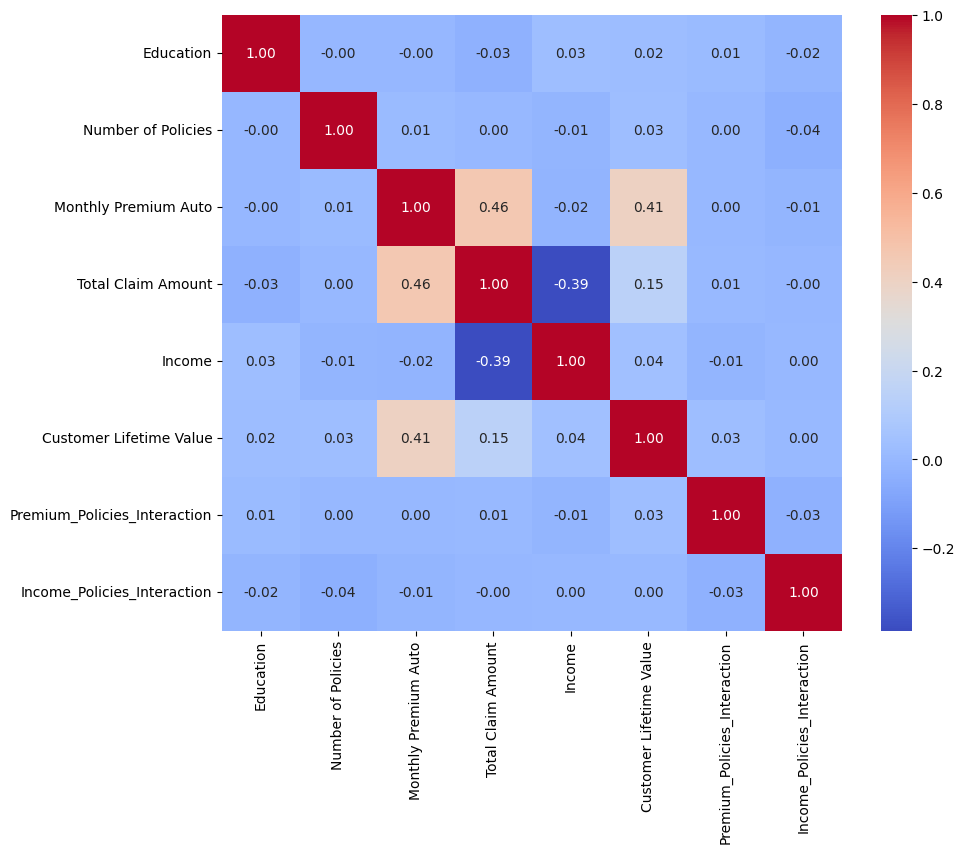

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Check if 'Education' column is still an object type
if df['Education'].dtype == 'object':
    # Apply LabelEncoder to 'Education'
    label_encoder = LabelEncoder()
    df['Education'] = label_encoder.fit_transform(df['Education'])

# Now, compute the correlation matrix for numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [ ]:
print(corr_matrix)


                              Education  Number of Policies  \
Education                      1.000000           -0.003582   
Number of Policies            -0.003582            1.000000   
Monthly Premium Auto          -0.002678            0.011854   
Total Claim Amount            -0.030228            0.002818   
Income                         0.026836           -0.014334   
Customer Lifetime Value        0.024568            0.030833   
Premium_Policies_Interaction   0.010711            0.001051   
Income_Policies_Interaction   -0.016721           -0.035953   

                              Monthly Premium Auto  Total Claim Amount  \
Education                                -0.002678           -0.030228   
Number of Policies                        0.011854            0.002818   
Monthly Premium Auto                      1.000000            0.460606   
Total Claim Amount                        0.460606            1.000000   
Income                                   -0.022242           -

#### Key Observations:
1. **Target Correlation**:
   - `Monthly Premium Auto` has a relatively strong positive correlation with `Customer Lifetime Value` (`0.407`).
   - `Total Claim Amount` has a moderate positive correlation with `Customer Lifetime Value` (`0.147`).
   - Other features have low correlations, suggesting limited direct impact on the target.

2. **Multicollinearity**:
   - `Monthly Premium Auto` and `Total Claim Amount` have a high correlation (`0.46`), which could potentially lead to multicollinearity.
   - Other features show minimal inter-feature correlations, which is favorable.

3. **Interaction Features**:
   - Interaction terms like `Premium_Policies_Interaction` and `Income_Policies_Interaction` show very low correlations with the target and other features, indicating limited usefulness.

**Check Multicollinearity with VIF**:
   - Start by calculating the VIF for all features.
   - If a feature has a high VIF (commonly >10), consider it a candidate for removal.
   - Choose the feature to remove by comparing VIF results with feature importance scores (from Step 2).

In [ ]:
print(X.dtypes)

Education                          int64
Number of Policies               float64
Monthly Premium Auto             float64
Total Claim Amount               float64
Income                           float64
Vehicle Class_1                     bool
Vehicle Class_2                     bool
Vehicle Class_3                     bool
Vehicle Class_4                     bool
Vehicle Class_5                     bool
Coverage_1                          bool
Coverage_2                          bool
Renew Offer Type_1                  bool
Renew Offer Type_2                  bool
Renew Offer Type_3                  bool
EmploymentStatus_1                  bool
EmploymentStatus_2                  bool
EmploymentStatus_3                  bool
EmploymentStatus_4                  bool
Marital Status_1                    bool
Marital Status_2                    bool
Premium_Policies_Interaction     float64
Income_Policies_Interaction      float64
Income_Binned                   category
Policies_Binned 

In [ ]:
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
bool_columns = X.select_dtypes(include=['bool']).columns
X[bool_columns] = X[bool_columns].astype(int)
X = X.apply(pd.to_numeric, errors='coerce')
print(X.info())  # Check data types and missing values
print(X.describe())  # Verify summary statistics
print(X.head())  # Inspect the first few rows


<class 'pandas.core.frame.DataFrame'>
Index: 5051 entries, 0 to 5668
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Education                     5051 non-null   int64  
 1   Number of Policies            5051 non-null   float64
 2   Monthly Premium Auto          5051 non-null   float64
 3   Total Claim Amount            5051 non-null   float64
 4   Income                        5051 non-null   float64
 5   Vehicle Class_1               5051 non-null   int64  
 6   Vehicle Class_2               5051 non-null   int64  
 7   Vehicle Class_3               5051 non-null   int64  
 8   Vehicle Class_4               5051 non-null   int64  
 9   Vehicle Class_5               5051 non-null   int64  
 10  Coverage_1                    5051 non-null   int64  
 11  Coverage_2                    5051 non-null   int64  
 12  Renew Offer Type_1            5051 non-null   int64  
 13  Renew Of

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                         Feature        VIF
0                      Education   4.772617
1             Number of Policies   6.306075
2           Monthly Premium Auto  16.893463
3             Total Claim Amount   1.619101
4                         Income   6.144424
5                Vehicle Class_1   4.511408
6                Vehicle Class_2   4.425076
7                Vehicle Class_3   8.161090
8                Vehicle Class_4   2.991777
9                Vehicle Class_5   1.409287
10                    Coverage_1   3.552002
11                    Coverage_2   4.165603
12            Renew Offer Type_1   1.867559
13            Renew Offer Type_2   1.461755
14            Renew Offer Type_3   1.399309
15            EmploymentStatus_1  11.817659
16            EmploymentStatus_2   1.681394
17            EmploymentStatus_3   1.250414
18            EmploymentStatus_4   5.595746
19              Marital Status_1   5.112870
20              Marital Status_2   3.174893
21  Premium_Policies_Interaction

In [ ]:
# Step 1: Handle NaN VIF values
# Drop one feature from each perfectly collinear group
X = X.drop(['Income_Binned_Medium', 'Policies_Binned_6+ Policies'], axis=1)

# Step 2: Address high VIF features
# Correlation check
correlation_matrix = X.corr()
print(correlation_matrix['Customer Lifetime Value'].sort_values(ascending=False))

# Drop high-VIF redundant features (example)
X = X.drop(['Monthly Premium Auto'], axis=1)

# Step 3: Create composite/interaction features (if needed)
# Ensure interaction features are orthogonal (low collinearity)
X['Premium_Policies_Interaction'] = X['Monthly Premium Auto'] * X['Number of Policies']

# Step 4: Train model with reduced feature set
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Ridge Regression to handle remaining multicollinearity
ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge_model.fit(X, y)

# Evaluate performance
scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation RMSE:", np.sqrt(-scores.mean()))

# Step 5: Final VIF check
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


KeyError: 'Customer Lifetime Value'

**Assess Feature Importance**:
   - Train a tree-based model (e.g., Random Forest or Gradient Boosting) to compute feature importance scores.
   - Use this to prioritize which features to keep, especially among those identified as problematic by VIF.

**Recursive Feature Elimination (RFE)**:
   - Use RFE as a final step to ensure only the most relevant features are retained.
   - This is particularly useful if you want to reduce the feature set to a specific number.

**Cross-Validation**:
   - After selecting features, validate the model's performance using cross-validation.
   - Compare the performance with and without the reduced feature set to ensure no significant loss of predictive power.

Yes, it's absolutely possible—and often recommended—to use **all three approaches** (VIF, Feature Importance, and RFE) in combination for a thorough feature selection process. Here's how you can organize and execute them effectively:  

---

### **Step-by-Step Plan to Combine All Methods**

1. 
2. 

3. 
4. 

---

### **Implementation Script**  
Here’s a consolidated script for doing all three:

```python


# Step 2: Compute Feature Importance with Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X, df['Customer Lifetime Value'])
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Step 3: Apply Recursive Feature Elimination (RFE)
gbr = GradientBoostingRegressor(random_state=42)
rfe = RFE(estimator=gbr, n_features_to_select=10)  # Select top 10 features
rfe.fit(X, df['Customer Lifetime Value'])

selected_features = X.columns[rfe.support_]
print("\nSelected Features via RFE:")
print(selected_features)

# Step 4: Evaluate Model with Cross-Validation (Before and After Selection)
# Original model with all features
all_features_score = cross_val_score(rf, X, df['Customer Lifetime Value'], cv=5, scoring='neg_mean_squared_error')

# Reduced model with selected features
X_selected = df[selected_features]
selected_features_score = cross_val_score(rf, X_selected, df['Customer Lifetime Value'], cv=5, scoring='neg_mean_squared_error')

print("\nModel Performance:")
print("All Features MSE:", -all_features_score.mean())
print("Selected Features MSE:", -selected_features_score.mean())
```

---

### **What You'll Get**
1. **VIF Report**:
   - Identifies features with potential multicollinearity issues.
2. **Feature Importance Report**:
   - Highlights which features contribute most to the target variable.
3. **Selected Features via RFE**:
   - Final list of features to use in the model.
4. **Cross-Validation Results**:
   - Performance comparison between models using all features and the selected subset.

---

### **Next Steps**
- Run the script above and analyze the results.
- If any feature appears redundant or irrelevant across all methods, it’s safe to remove it.
- Once the feature set is finalized, proceed with **model training and tuning**.

Would you like help interpreting the results or further optimizing your feature selection process?

**Final Feature Set**  
   The final feature set will include:
   - Key numerical features: 'Income', 'Monthly Premium Auto', 'Total Claim Amount', 'Number of Policies'.
   - Categorical features after One-Hot Encoding: 'Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status', 'Marital Status', 'Education'.
   - Interaction features: 'Monthly Premium Auto' * 'Number of Policies', 'Income' * 'Number of Policies'.
   - Binned features: Income brackets and Number of Policies categories.
   - Transformed features: Log-transformed values of skewed features like 'Total Claim Amount' and 'Income'.

### **Modeling and Evaluation (with multiple algorithms)**  



### **Conclusions and Recommendations**  
